In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN: (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0–9
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.8931 - loss: 0.3466 - val_accuracy: 0.9822 - val_loss: 0.0578
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9841 - loss: 0.0510 - val_accuracy: 0.9883 - val_loss: 0.0370
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9887 - loss: 0.0345 - val_accuracy: 0.9907 - val_loss: 0.0327
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9926 - loss: 0.0252 - val_accuracy: 0.9885 - val_loss: 0.0372
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 27ms/step - accuracy: 0.9949 - loss: 0.0164 - val_accuracy: 0.9897 - val_loss: 0.0341


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9870 - loss: 0.0413
Test Accuracy: 0.99


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


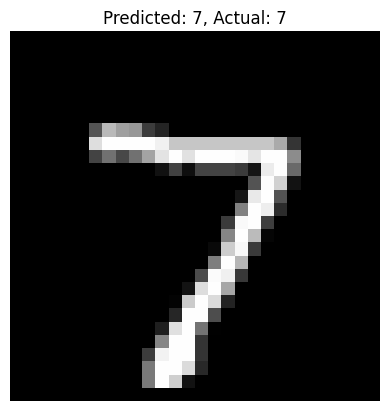

In [6]:
predictions = model.predict(x_test)

# Show one prediction
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {tf.argmax(predictions[0]).numpy()}, Actual: {y_test[0]}")
plt.axis('off')
plt.show()


In [7]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('mnist_model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp192f474q'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137390854194960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390857485968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390854193232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390854195536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390854195152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390854196688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390857485776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390854195728: TensorSpec(shape=(), dtype=tf.resource, name=None)


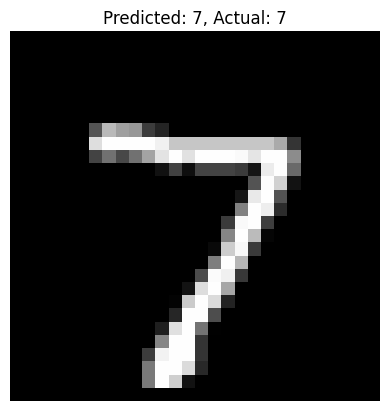

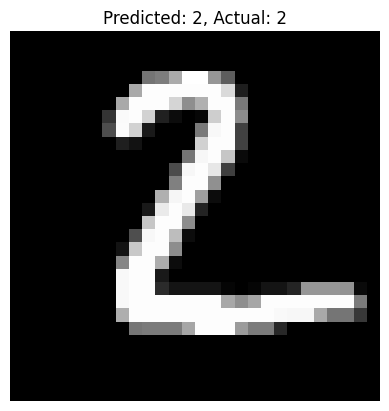

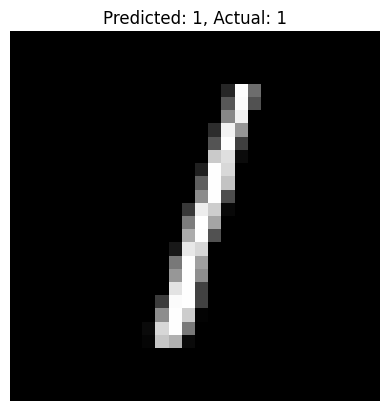

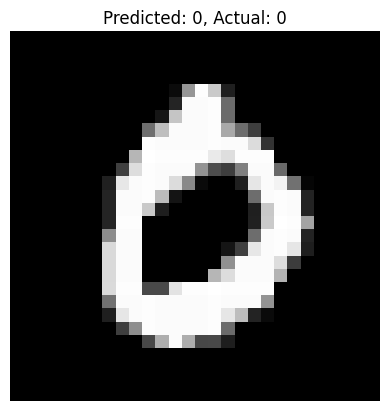

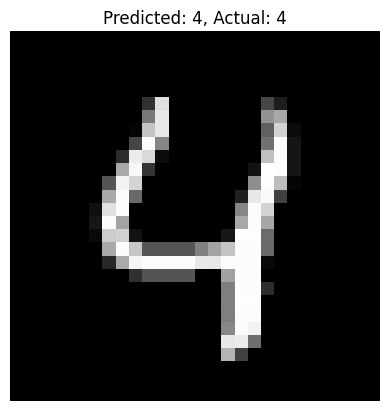

In [8]:
import numpy as np

# Show 5 test samples with predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()


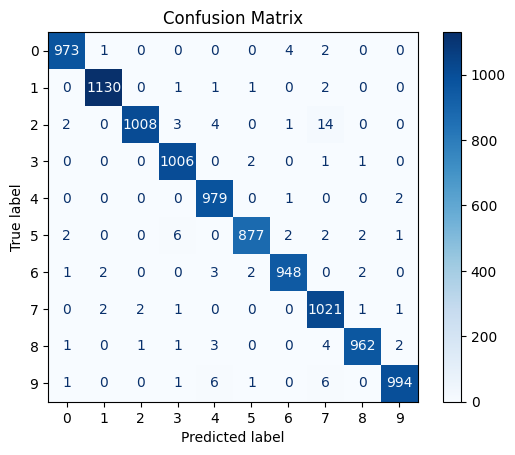

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [10]:
model.save("mnist_cnn_model.h5")


In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("mnist_model.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ TFLite model saved!")


Saved artifact at '/tmp/tmpx2k6vv3f'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137390854194960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390857485968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390854193232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390854195536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390854195152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390854196688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390857485776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137390854195728: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ TFLite model saved!
